# Week 6 - Deep Learning

The goal of this assignment is to test and compare some simple deep learning architectures for the problem of image classification. We will be using the Tensorflow framework.
The CIFAR-10 dataset contains 60000 images divided into 10 classes. The set is split in 50000 and 10000 samples for the training and testing set, respectively. The tutorial found at [https://www.tensorflow.org/tutorials/images/cnn] gives a good introduction to this practical exercise. The essential code for this tutorial can be found in the provided script 'ConvNet.py' or as a Jupyter notebook in [https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb].

## Imports

In [18]:
import numpy as np
import pandas as pd
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RNDS = 1389

## Data

In [24]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## MLP

In [4]:
model = models.Sequential([
    layers.Flatten(),
    layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

model.summary()

test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9577 - accuracy: 0.3205 - val_loss: 1.8686 - val_accuracy: 0.3384
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8890 - accuracy: 0.3500 - val_loss: 1.8540 - val_accuracy: 0.3601
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8480 - accuracy: 0.3624 - val_loss: 1.8320 - val_accuracy: 0.3556
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8404 - accuracy: 0.3673 - val_loss: 1.8558 - val_accuracy: 0.3586
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8298 - accuracy: 0.3735 - val_loss: 1.8478 - val_accuracy: 0.3678
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8223 - accuracy: 0.3776 - val_loss: 1.8252 - val_accuracy: 0.3724
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8240 - accuracy: 0.3773 - val_loss: 1.8838 - val_accuracy:

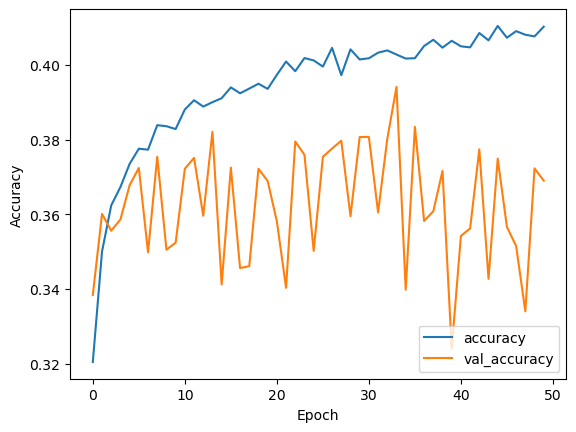

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## ConvNet

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # from this we know that input dimensions are 32x32x3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

model.summary()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.5252 - accuracy: 0.4445 - val_loss: 1.2225 - val_accuracy: 0.5657
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1642 - accuracy: 0.5877 - val_loss: 1.1179 - val_accuracy: 0.5959
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0151 - accuracy: 0.6405 - val_loss: 1.0399 - val_accuracy: 0.6289
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9174 - accuracy: 0.6772 - val_loss: 1.0570 - val_accuracy: 0.6359
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8460 - accuracy: 0.7011 - val_loss: 0.9351 - val_accuracy: 0.6790
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7876 - accuracy: 0.7234 - val_loss: 0.9069 - val_accuracy: 0.6831
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7424 - accuracy: 0.7416 - val_loss: 0.8969 - val_accuracy

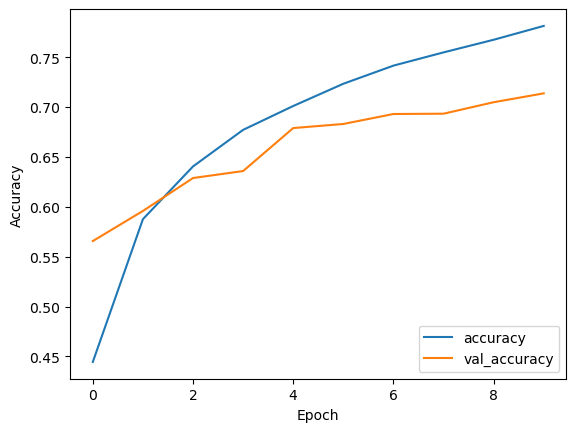

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Utility

In [4]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

## Exercise 1

Modify the provided MLP model. Use architectures with 0, 1 and 2 hidden layers. Keep the complexity of the model bounded, so runs do not take much more than 1 hour to reach the maximum of testing accuracy. Notice that the input needs to be "flattened", since there is no spatial structure 
in this fully connected design. This can be achieved by adding a dummy layer with no free parameters with "layers.Flatten()" as the first layer in the constructor "model.Sequential()". Obtain the learning curves and discuss the results.
Report the optimizer in use, initialization parameters, the learning rate, etc. Is early stopping convenient in this model?

### Models

In [15]:
# 0 layers
mlp_0_layer = models.Sequential([
    layers.Flatten(),
    layers.Dense(10, activation='softmax')])
mlp_0_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 1 layer
mlp_1_layer = models.Sequential([
    layers.Flatten(),
    layers.Dense(1536, activation='relu'),
    layers.Dense(10, activation='softmax')
])
mlp_1_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 2 layers
mlp_2_layer = models.Sequential([
    layers.Flatten(),
    layers.Dense(1536, activation='relu'),
    layers.Dense(768, activation='relu'),
    layers.Dense(10, activation='softmax')
])
mlp_2_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/1000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7544 - accuracy: 0.4057 - f1_score: 3.7955 - val_loss: 1.8743 - val_accuracy: 0.3649 - val_f1_score: 3.7753
Epoch 2/1000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7576 - accuracy: 0.4038 - f1_score: 3.7936 - val_loss: 1.8859 - val_accuracy: 0.3553 - val_f1_score: 3.7621
Epoch 3/1000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7575 - accuracy: 0.4015 - f1_score: 3.7766 - val_loss: 1.9000 - val_accuracy: 0.3598 - val_f1_score: 3.6117
Epoch 4/1000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7578 - accuracy: 0.4045 - f1_score: 3.7642 - val_loss: 1.8762 - val_accuracy: 0.3659 - val_f1_score: 3.8537
Epoch 5/1000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7562 - accuracy: 0.4027 - f1_score: 3.7715 - val_loss: 1.9996 - val_accuracy: 0.3232 - val_f1_score: 3.3427
Epoch 6/1000
1563/1563 [==============================] - 6s

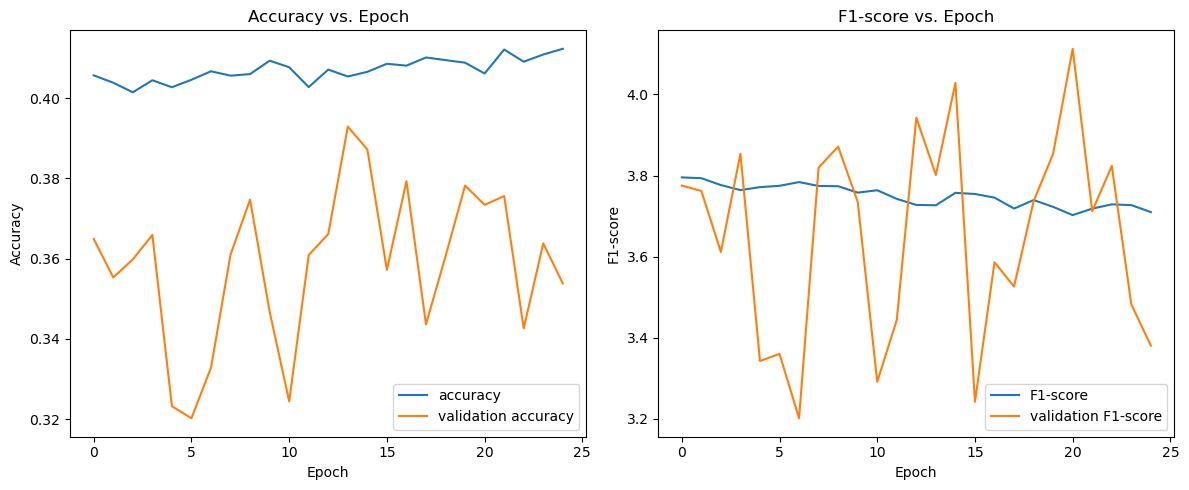

In [17]:
# fitting for 0 layer model
mlp_0_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_score])

history_mlp_0_layer = mlp_0_layer.fit(train_images, train_labels, epochs=400,
                    validation_data=(test_images, test_labels), callbacks=[early_stop])

mlp_0_layer.summary()

test_loss, test_acc, test_f1 = mlp_0_layer.evaluate(test_images, test_labels)

# plotting
plt.figure(figsize=(12, 5))
# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp_0_layer.history['accuracy'], label='accuracy')
plt.plot(history_mlp_0_layer.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy vs. Epoch')
# F1-score
plt.subplot(1, 2, 2)
plt.plot(history_mlp_0_layer.history['f1_score'], label='F1-score')
plt.plot(history_mlp_0_layer.history['val_f1_score'], label='validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.title('F1-score vs. Epoch')
plt.tight_layout()
plt.show()

Epoch 1/1000
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9137 - accuracy: 0.3276 - f1_score: 5.7059 - val_loss: 1.7373 - val_accuracy: 0.3806 - val_f1_score: 5.3192
Epoch 2/1000
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6854 - accuracy: 0.3957 - f1_score: 4.7478 - val_loss: 1.6525 - val_accuracy: 0.4119 - val_f1_score: 4.4635
Epoch 3/1000
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6237 - accuracy: 0.4198 - f1_score: 4.4143 - val_loss: 1.6128 - val_accuracy: 0.4241 - val_f1_score: 4.6125
Epoch 4/1000
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5698 - accuracy: 0.4394 - f1_score: 4.1823 - val_loss: 1.5979 - val_accuracy: 0.4250 - val_f1_score: 4.2113
Epoch 5/1000
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5468 - accuracy: 0.4490 - f1_score: 4.0398 - val_loss: 1.6038 - val_accuracy: 0.4412 - val_f1_score: 3.7307
Epoch 6/1000
1563/1563 [==============================] - 8s

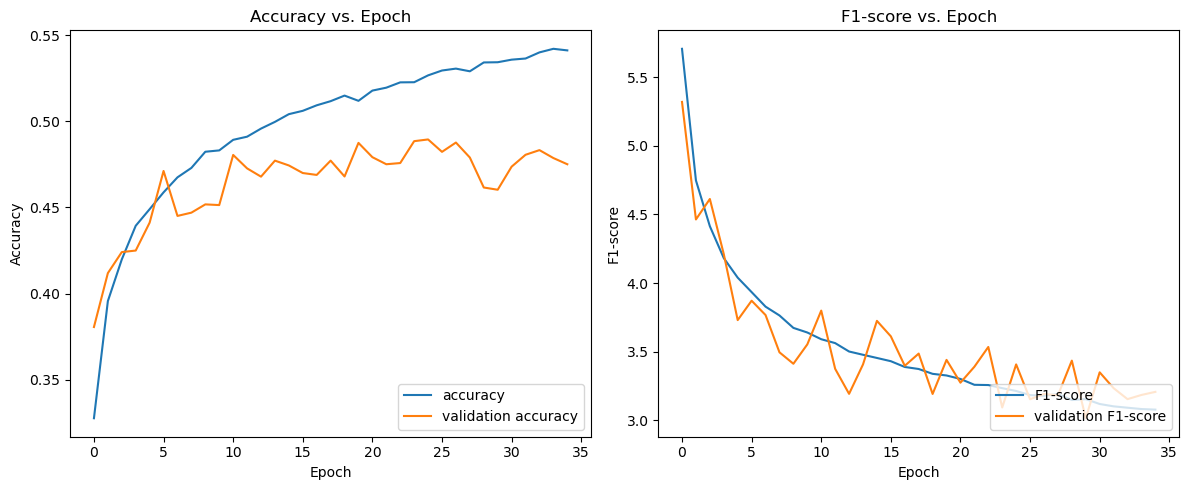

In [18]:
# fitting for 1 layer model
mlp_1_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_score])

history_mlp_1_layer = mlp_1_layer.fit(train_images, train_labels, epochs=400,
                    validation_data=(test_images, test_labels), callbacks=[early_stop])

mlp_1_layer.summary()

test_loss, test_acc, test_f1 = mlp_1_layer.evaluate(test_images, test_labels)

# plotting
plt.figure(figsize=(12, 5))
# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp_1_layer.history['accuracy'], label='accuracy')
plt.plot(history_mlp_1_layer.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy vs. Epoch')
# F1-score
plt.subplot(1, 2, 2)
plt.plot(history_mlp_1_layer.history['f1_score'], label='F1-score')
plt.plot(history_mlp_1_layer.history['val_f1_score'], label='validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.title('F1-score vs. Epoch')
plt.tight_layout()
plt.show()

Epoch 1/1000
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8717 - accuracy: 0.3324 - f1_score: 5.5024 - val_loss: 1.6605 - val_accuracy: 0.4080 - val_f1_score: 4.7526
Epoch 2/1000
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6571 - accuracy: 0.4046 - f1_score: 4.5008 - val_loss: 1.6624 - val_accuracy: 0.3983 - val_f1_score: 3.7688
Epoch 3/1000
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5795 - accuracy: 0.4342 - f1_score: 4.1556 - val_loss: 1.6076 - val_accuracy: 0.4262 - val_f1_score: 4.6575
Epoch 4/1000
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5294 - accuracy: 0.4521 - f1_score: 3.9566 - val_loss: 1.5706 - val_accuracy: 0.4369 - val_f1_score: 3.8463
Epoch 5/1000
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4939 - accuracy: 0.4663 - f1_score: 3.8137 - val_loss: 1.5106 - val_accuracy: 0.4572 - val_f1_score: 3.7242
Epoch 6/1000
1563/1563 [==============================] - 9s

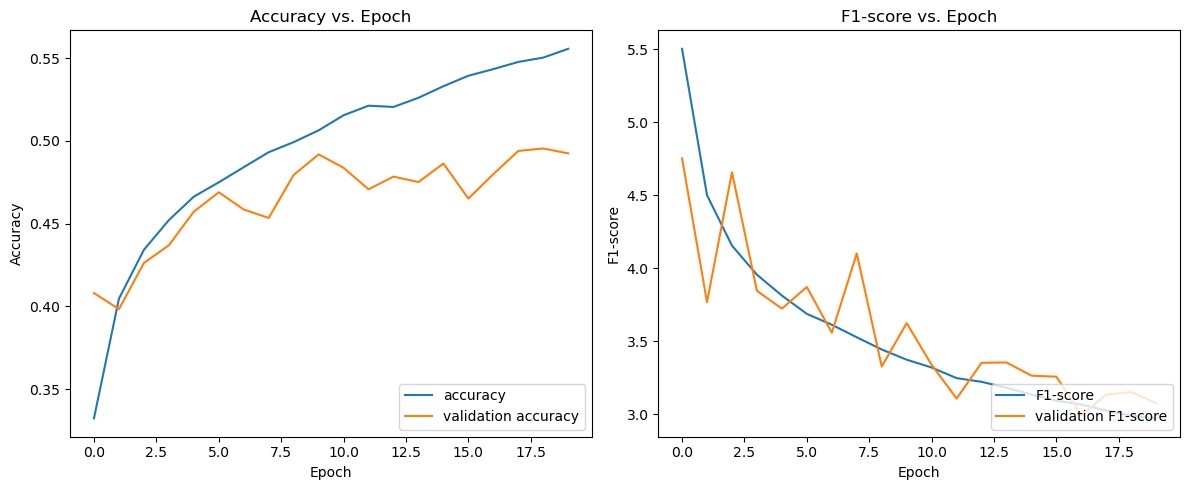

In [19]:
# fitting for 2 layer model
mlp_2_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_score])

history_mlp_2_layer = mlp_2_layer.fit(train_images, train_labels, epochs=400,
                    validation_data=(test_images, test_labels), callbacks=[early_stop])

mlp_2_layer.summary()

test_loss, test_acc, test_f1 = mlp_2_layer.evaluate(test_images, test_labels)

# plotting
plt.figure(figsize=(12, 5))
# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp_2_layer.history['accuracy'], label='accuracy')
plt.plot(history_mlp_2_layer.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy vs. Epoch')
# F1-score
plt.subplot(1, 2, 2)
plt.plot(history_mlp_2_layer.history['f1_score'], label='F1-score')
plt.plot(history_mlp_2_layer.history['val_f1_score'], label='validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.title('F1-score vs. Epoch')
plt.tight_layout()
plt.show()

## Exercise 2

Reuse the code from Exercise 1 to build and run an MLP with one hidden layer, as big a you can. Compare the performance of your design with the results appearing in Table 1 of [https://arxiv.org/pdf/1611.03530.pdf] for an MLP of 512 units in a single hidden layer. Report the best result found for a maximum of 1000 epochs or 2 hours CPU running time.
The best accuracy amongst all teams will be awarded extra points.

In [25]:
# we need to augment our data to improve the model's performance, otherwise it'll get stuck like models from exercise 1
datagen = ImageDataGenerator(rotation_range=30, horizontal_flip=True) # randomly rotates the image by up to 45 degrees and/or flips it horizontally
datagen.fit(train_images)
# we have to have an actual validation set for this, we cannot evaluate the model properly otherwise
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=RNDS)

In [27]:
weight_decay = 0.01 # for dense layers
alpha_value = 0.1 # for LeakyReLU
num_epochs = 1000 # to be within 2 CPU hours

# redefine our 1 layer model
mlp_1_layer = models.Sequential([
    layers.Flatten(),
    layers.Dense(2048, kernel_regularizer=regularizers.l2(weight_decay)), # let's try to not run out of memory, LOL
    layers.LeakyReLU(alpha=alpha_value),
    layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(weight_decay))
])

mlp_1_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_score])

early_stop = EarlyStopping(monitor='val_accuracy', patience=num_epochs // 20) # since we're interested in accuracy now
checkpoint = ModelCheckpoint('./models/ass5_mlp_1_layer.h5', monitor='val_accuracy', save_best_only=True)

history_mlp_1_layer = mlp_1_layer.fit(datagen.flow(train_images, train_labels, batch_size=32),
                                     epochs=num_epochs,
                                     validation_data=(val_images, val_labels),
                                     callbacks=[early_stop, checkpoint],
                                     steps_per_epoch=len(train_images) // 32) # number of batches per epoch

best_model = load_model('./models/ass5_mlp_1_layer.h5')
test_loss, test_acc, test_f1 = best_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc*100:.4f}%", f"Test F1-Score: {test_f1:.4f}")

Epoch 1/1000
1250/1250 [==============================] - 15s 12ms/step - loss: 3.4835 - accuracy: 0.1168 - f1_score: 6.4981 - val_loss: 2.1540 - val_accuracy: 0.0266 - val_f1_score: 6.5966
Epoch 2/1000
1250/1250 [==============================] - 14s 11ms/step - loss: 2.1414 - accuracy: 0.1178 - f1_score: 6.4154 - val_loss: 2.1478 - val_accuracy: 0.0392 - val_f1_score: 5.6975
Epoch 3/1000
1250/1250 [==============================] - 14s 11ms/step - loss: 2.1603 - accuracy: 0.1129 - f1_score: 6.0834 - val_loss: 2.1069 - val_accuracy: 0.0963 - val_f1_score: 5.3974
Epoch 4/1000
1250/1250 [==============================] - 14s 11ms/step - loss: 2.1624 - accuracy: 0.1104 - f1_score: 5.8459 - val_loss: 2.0915 - val_accuracy: 0.1846 - val_f1_score: 6.5698
Epoch 5/1000
1250/1250 [==============================] - 16s 13ms/step - loss: 2.1148 - accuracy: 0.1084 - f1_score: 5.8624 - val_loss: 2.0456 - val_accuracy: 0.0883 - val_f1_score: 5.4924
Epoch 6/1000
1250/1250 [==========================

KeyboardInterrupt: 

In [ ]:
# plotting
plt.figure(figsize=(12, 5))
# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp_1_layer.history['accuracy'], label='accuracy')
plt.plot(history_mlp_1_layer.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy vs. Epoch')
# F1-score
plt.subplot(1, 2, 2)
plt.plot(history_mlp_1_layer.history['f1_score'], label='F1-score')
plt.plot(history_mlp_1_layer.history['val_f1_score'], label='validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.title('F1-score vs. Epoch')
plt.tight_layout()
plt.show()

## Exercise 3

Study the performance properties of the convolutional network provided. How is the learning affected if instead of ReLU units, tanh() activations are used? What is the reason for this? Compare also at least two different optimizer algorithms.

## Exercise 4

Try to outperform the convolutional network from Exercise 3 with an MLP that uses approximately the same number of parameters.
Report your results and explain them.